In [85]:
import random
random.seed(24071992)
import numpy as np
np.random.seed(24071992)
import matplotlib
import matplotlib.pyplot as plt
import scipy.spatial
import pickle
import pandas as pd
import scipy
# http://stackoverflow.com/questions/10143905/python-two-curve-gaussian-fitting-with-non-linear-least-squares
from sklearn import mixture
import matplotlib.pyplot
import matplotlib.mlab
import numpy as np
import itertools
import seaborn as sns
import math


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib notebook

In [2]:
import scipy
scipy.spatial.KDTree.sparse_distance_matrix

<function scipy.spatial.kdtree.KDTree.sparse_distance_matrix>

# Random cells

In [3]:
centroid = np.random.rand(50,2)

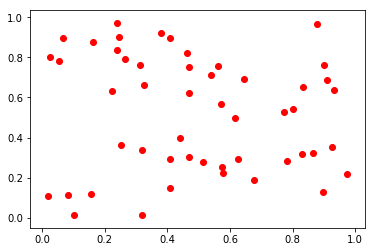

In [4]:
def cell_scatter(arr2D, color='blue'):
    for i in range(len(arr2D)):
        plt.scatter(arr2D[i][0], arr2D[i][1], c=color)
        
cell_scatter(centroid, 'red')

In [ ]:
cloud = 20
dots = np.zeros([len(centroid)*cloud, 2])
for i, p in enumerate(centroid):
    for n in range(cloud):
        pos = i*cloud + n
        x_shift = np.random.normal(0, scale=0.02)
        y_shift = np.random.normal(0, scale=0.02)
        dots[pos] = p[0]+x_shift, p[1]+y_shift

cell_scatter(dots)
cell_scatter(centroid, color='red')

In [ ]:
dist = scipy.spatial.distance.pdist(centroid)
plt.hist(dist,bins=200)

# Cells in a grid

[ 0.  0.]
[ 0.  1.]
[ 0.  2.]
[ 0.  3.]
[ 1.  0.]
[ 1.  1.]
[ 1.  2.]
[ 1.  3.]
[ 2.  0.]
[ 2.  1.]
[ 2.  2.]
[ 2.  3.]
[ 3.  0.]
[ 3.  1.]
[ 3.  2.]
[ 3.  3.]


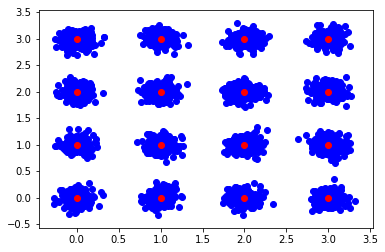

In [6]:
cloud = 200
grid_c = np.zeros([16, 2])

for i, p in enumerate(grid_c):
    x = int(i/4)
    y = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
    y = y[i]
    grid_c[i] = x,y

    
grid_p = np.zeros([len(grid_c)*cloud, 2])
for i, p in enumerate(grid_c):
    print(p)
    for n in range(cloud):
        pos = i*cloud + n
        x_shift = np.random.normal(0, scale=0.1)
        y_shift = np.random.normal(0, scale=0.1)
        grid_p[pos] = p[0]+x_shift, p[1]+y_shift
    
cell_scatter(grid_p)
cell_scatter(grid_c, color='red')

In [ ]:
dist = scipy.spatial.distance.pdist(grid_p, )
plt.hist(dist,bins=100)

In [7]:
#scipy.spatial.KDTree.sparse_distance_matrix()
grid_p_tree = scipy.spatial.KDTree(grid_p)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4. ]


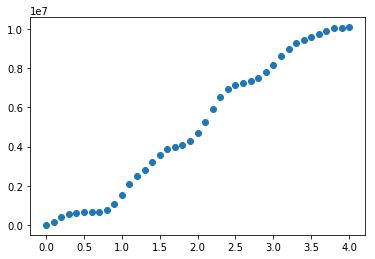

In [8]:
interval = np.linspace(0,4,41)
print(interval)
plt.scatter(interval, grid_p_tree.count_neighbors(grid_p_tree, interval))
#Logically, the KDTree has more neighbours if you increase the range.
#You see the same jumps as with the above histogram

# Sparse distance matrix

In [44]:
grid_p_sparse = grid_p_tree.sparse_distance_matrix(grid_p_tree, max_distance=2)
grid_p_sparse

<3200x3200 sparse matrix of type '<class 'numpy.float64'>'
	with 4698998 stored elements in Dictionary Of Keys format>

(array([   6496.,   19160.,   30330.,   40512.,   47516.,   52444.,
          54608.,   54668.,   52634.,   48082.,   44074.,   38044.,
          32622.,   26990.,   22254.,   17742.,   13358.,   10314.,
           7486.,    5502.,    3938.,    2790.,    1932.,    1334.,
            946.,     738.,     618.,     776.,     956.,    1334.,
           1932.,    2954.,    3992.,    5808.,    8218.,   11076.,
          14762.,   19332.,   24830.,   31540.,   38524.,   47686.,
          56750.,   65692.,   75354.,   85016.,   93006.,  100220.,
         105344.,  109842.,  111226.,  110212.,  107662.,  103292.,
          97946.,   91940.,   84958.,   79010.,   73436.,   68522.,
          65482.,   64190.,   63916.,   65272.,   67312.,   70246.,
          74796.,   77660.,   81642.,   83248.,   84310.,   82730.,
          81382.,   78482.,   72992.,   67194.,   60664.,   54248.,
          47204.,   40156.,   34500.,   28798.,   24788.,   21204.,
          19030.,   18006.,   18024.,   19706., 

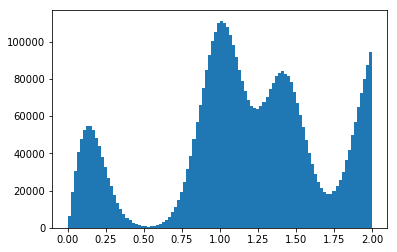

In [45]:
sparse_values = np.array(list(grid_p_sparse.values()))
plt.hist(sparse_values, bins=100)

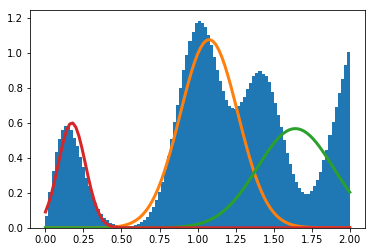

In [51]:

clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
data = np.reshape(sparse_values, (len(sparse_values),1))
clf.fit(data)
m1, m2, m3 = clf.means_
w1, w2, w3= clf.weights_
c1, c2, c3 = clf.covariances_
histdist = matplotlib.pyplot.hist(data, 100, normed=True)
plotgauss1 = lambda x: plt.plot(x,w1*matplotlib.mlab.normpdf(x,m1,np.sqrt(c1))[0], linewidth=3)
plotgauss2 = lambda x: plt.plot(x,w2*matplotlib.mlab.normpdf(x,m2,np.sqrt(c2))[0], linewidth=3)
plotgauss3 = lambda x: plt.plot(x,w3*matplotlib.mlab.normpdf(x,m3,np.sqrt(c3))[0], linewidth=3)
plotgauss1(histdist[1])
plotgauss2(histdist[1])
plotgauss3(histdist[1])

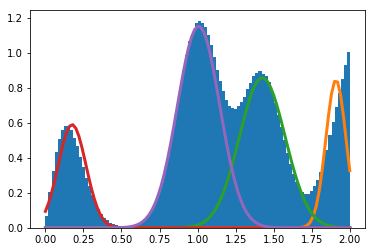

In [53]:

clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
data = np.reshape(sparse_values, (len(sparse_values),1))
clf.fit(data)
m1, m2, m3, m4 = clf.means_
w1, w2, w3, w4= clf.weights_
c1, c2, c3, c4 = clf.covariances_
histdist = matplotlib.pyplot.hist(data, 100, normed=True)
plotgauss1 = lambda x: plt.plot(x,w1*matplotlib.mlab.normpdf(x,m1,np.sqrt(c1))[0], linewidth=3)
plotgauss2 = lambda x: plt.plot(x,w2*matplotlib.mlab.normpdf(x,m2,np.sqrt(c2))[0], linewidth=3)
plotgauss3 = lambda x: plt.plot(x,w3*matplotlib.mlab.normpdf(x,m3,np.sqrt(c3))[0], linewidth=3)
plotgauss4 = lambda x: plt.plot(x,w4*matplotlib.mlab.normpdf(x,m4,np.sqrt(c4))[0], linewidth=3)
plotgauss1(histdist[1])
plotgauss2(histdist[1])
plotgauss3(histdist[1])
plotgauss4(histdist[1])

# Vorronoi
    move this later to another notebook

In [142]:
five = np.random.rand(5, 2)
ten = np.random.rand(10,2)

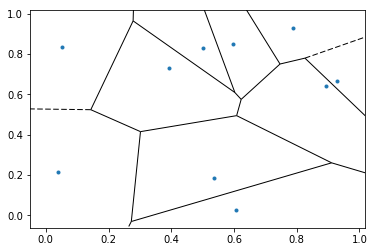

In [143]:
vor = scipy.spatial.Voronoi(ten)
scipy.spatial.voronoi_plot_2d(vor, show_vertices=False);

In [111]:
plt.scatter(vor.ridge_vertices)

TypeError: scatter() missing 1 required positional argument: 'y'

In [141]:
e = vor.ridge_vertices

e[0:1,:]

TypeError: list indices must be integers or slices, not tuple

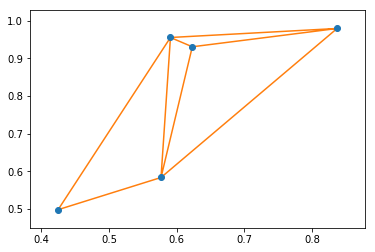

In [89]:
dela = scipy.spatial.Delaunay(five)
scipy.spatial.delaunay_plot_2d(dela);

# Cortex data

In [10]:
df_fish_totmol_clean = pickle.load(open("df_fish_totmol_clean.p", 'rb'))
df_coord = pickle.load(open("Cell_coordinates.p", 'rb'))
df_coord = df_coord.loc[:,df_fish_totmol_clean.columns]
df_coord = df_coord.T
labels_a = pickle.load(open("labels_a_df_fish_totmol_clean.p", 'rb'))

In [24]:
label_cells = {}
for i in np.unique(labels_a):
    label_cells[i] = []

for n,c in enumerate(df_fish_totmol_clean.columns):
    label_cells[labels_a[n]].append(c)
    

<IPython.core.display.Javascript object>


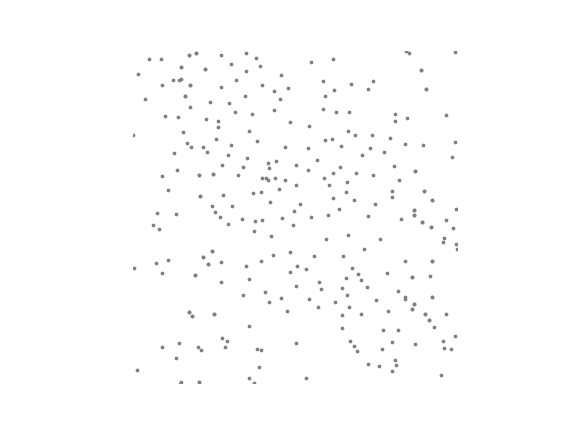

In [11]:
plt.figure()
plt.scatter(df_coord.loc[:,'X'], df_coord.loc[:,'Y'], c='gray', s=4)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_axis_off()
ax.invert_yaxis()
ax.invert_xaxis()

In [13]:
tree = scipy.spatial.KDTree(df_coord)
sparse_dm = tree.sparse_distance_matrix(tree, max_distance=1000)

In [14]:
dense_dm = sparse_dm.todense()
df_dense_dm = pd.DataFrame(data=dense_dm, index=df_coord.index, columns=df_coord.index)

In [18]:
df_dense_dm.head(5)

,1124,2325,2400,241,6248,2573,330,1149,6527,4813,...,821,1217,5162,532,3607,3251,2757,1228,1234,4653
1124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,823.24735,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


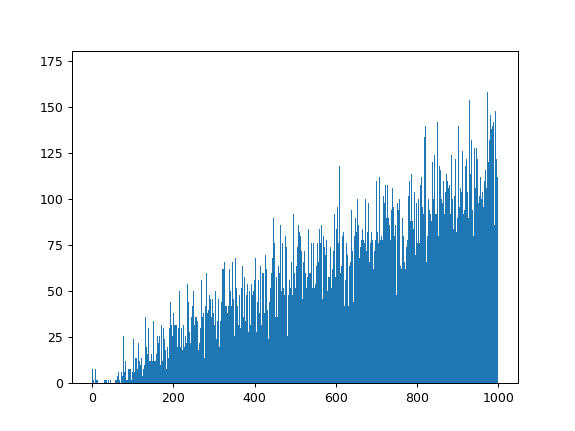

In [31]:
plt.figure()
sparse_values = np.array(list(sparse_dm.values()))
plt.hist(sparse_values, bins=2000, );

In [83]:
count = 0
for i in itertools.combinations(np.unique(labels_a), 2):
    count += 1
    #print(i)
print(count)

465


In [104]:
n_clust = len(np.unique(labels_a))    
n_combi = math.factorial(n_clust) / ((math.factorial(2)) * math.factorial(n_clust - 2))

combinations = [i for i in itertools.combinations(np.unique(labels_a), 2)]

<IPython.core.display.Javascript object>


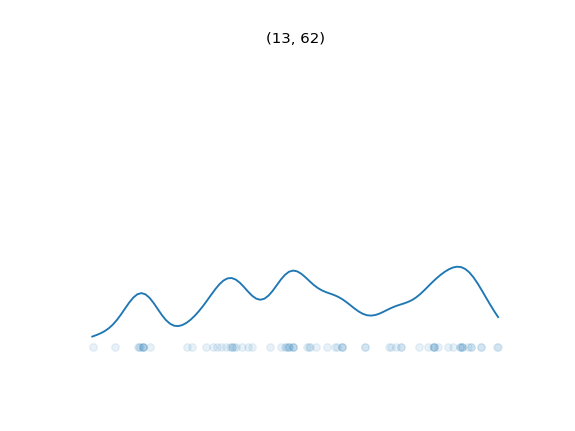

Text(0.5,1,'(13, 62)')

In [117]:
interest = 11
cl_1 = combinations[interest][0]
cl_2 = combinations[interest][1]
dist_of_interest = df_dense_dm.loc[label_cells[cl_1], label_cells[cl_2]].values.ravel()
dist_of_interest = dist_of_interest[dist_of_interest != 0]

plt.figure()
plt.scatter(dist_of_interest, np.zeros(len(dist_of_interest)), alpha=0.1)
sns.kdeplot(dist_of_interest, bw=0.15)
plt.ylim((-0.001, 0.008))
plt.gca().set_axis_off()
plt.title(combinations[interest])

In [76]:
for combi in  itertools.permutations(np.unique(labels_a[:5]), 2):
    

(63, 78)
(63, 89)
(63, 91)
(78, 63)
(78, 89)
(78, 91)
(89, 63)
(89, 78)
(89, 91)
(91, 63)
(91, 78)
(91, 89)


<IPython.core.display.Javascript object>


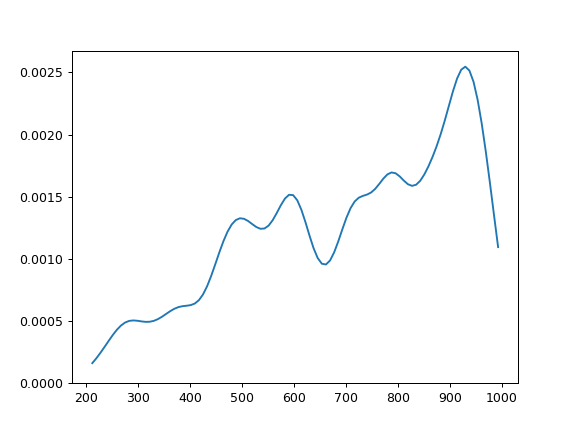

In [70]:
sns.kdeplot(dist_of_interest, bw=0.15)